# Simple Neural Network
Meichen Lu (meichenlu91@gmail.com) 13rd April 2018

In this notebook, I will implement a simple 2-layer neural network. Then it will be tested on the MNIST data set.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def fprop_logistic(x, y, params):
  # Follows procedure given in notes
    W1, b1, W2, b2 = [params[key] for key in ('W1', 'b1', 'W2', 'b2')]
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    loss = -(y * np.log(a2) + (1-y) * np.log(1-a2))
    ret = {'x': x, 'y': y, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'loss': loss}
    for key in params:
        ret[key] = params[key]
    return ret

In [4]:
def bprop_logistic(fprop_cache):
  # Follows procedure given in notes
    x, y, z1, a1, z2, a2, loss = [fprop_cache[key] for key in ('x', 'y', 'z1', 'a1', 'z2', 'a2', 'loss')]
    dz2 = (a2 - y)
    dW2 = np.dot(dz2, a1.T)
    db2 = dz2
    dz1 = np.dot(fprop_cache['W2'].T, dz2) * sigmoid(z1) * (1-sigmoid(z1))
    dW1 = np.dot(dz1, x.T)
    db1 = dz1
    return {'b1': db1, 'W1': dW1, 'b2': db2, 'W2': dW2}

In [5]:
def bprop_logistic_vec(fprop_cache):
  # Vectorised version of the bprop_logistic()
    x, y, z1, a1, z2, a2, loss = [fprop_cache[key] for key in ('x', 'y', 'z1', 'a1', 'z2', 'a2', 'loss')]
    delta2 = (a2 - y)
    dW2 = np.dot(delta2, a1.T)/np.size(y)
    db2 = np.mean(delta2, 1)
    db2 = db2.reshape([-1,1])
    delta1 = np.dot(fprop_cache['W2'].T, delta2) * sigmoid(z1) * (1-sigmoid(z1))
    dW1 = np.dot(delta1, x.T)/np.size(y)
    db1 = np.mean(delta1,1)
    db1 = db1.reshape([-1,1])
    return {'b1': db1, 'W1': dW1, 'b2': db2, 'W2': dW2}

In [6]:
def numerical_gradient_bprop_logistic(m, n, params):
    from copy import copy
# Initialize random parameters and inputs
    x = np.random.rand(m, n)
    y = np.random.randint(0, 2, size=(1,n))  # Returns 0/1

    fprop_cache = fprop_logistic(x, y, params)
    if n == 1:
        print('check stochastic gradient descent')
        bprop_cache = bprop_logistic(fprop_cache)
    else:
        bprop_cache = bprop_logistic_vec(fprop_cache)
    
    # Numerical gradient checking
    # Note how slow this is! Thus we want to use the backpropagation algorithm instead.
    eps = 1e-6
    ng_cache = {}
    # For every single parameter (W, b)
    for key in params:
        param = params[key]
        # This will be our numerical gradient
        ng = np.zeros(param.shape)
        for j in range(ng.shape[0]):
            for k in range(ng.shape[1]):
                # For every element of parameter matrix, compute gradient of loss wrt
                # that element numerically using finite differences
                add_eps = np.copy(param)
                min_eps = np.copy(param)
                add_eps[j, k] += eps
                min_eps[j, k] -= eps
                add_params = copy(params)
                min_params = copy(params)
                add_params[key] = add_eps
                min_params[key] = min_eps
                ng[j, k] = np.mean(fprop_logistic(x, y, add_params)['loss'] - fprop_logistic(x, y, min_params)['loss']) / (2 * eps)
            ng_cache[key] = ng

    # Compare numerical gradients to those computed using backpropagation algorithm
    for key in params:
        print(key)
        # These should be the same
        print(bprop_cache[key])
        print(ng_cache[key])

In [7]:
def initialise_param(m, n, n1, n2):
    '''
    m features, n samples, first layer with n1 cells, second layer with n2 cells
    '''
    W1 = np.random.randn(n1, m)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

In [8]:
m = 2 # features
n = 1 # examples
params = initialise_param(m, n, n1 = 3, n2 = 1)
# Stochastic case
numerical_gradient_bprop_logistic(m, n, params)

check stochastic gradient descent
W1
[[  3.32002483e-02   5.38192642e-03]
 [  1.18384431e-04   1.91907088e-05]
 [ -2.28955074e-02  -3.71147634e-03]]
[[  3.32002484e-02   5.38192640e-03]
 [  1.18384441e-04   1.91906213e-05]
 [ -2.28955075e-02  -3.71147646e-03]]
b1
[[ 0.0688102 ]
 [ 0.00024536]
 [-0.04745279]]
[[ 0.0688102 ]
 [ 0.00024536]
 [-0.04745279]]
W2
[[-0.21289843 -0.31432346 -0.24979858]]
[[-0.21289843 -0.31432346 -0.24979858]]
b2
[[-0.36812825]]
[[-0.36812825]]


In [9]:
m = 2 # features
n = 2 # examples
params = initialise_param(m, n, n1 = 3, n2 = 1)
# Vectorised case
numerical_gradient_bprop_logistic(m, n, params)

W1
[[-0.01259289 -0.00065788]
 [ 0.00435093 -0.00260064]
 [-0.02188307  0.00108945]]
[[-0.01259289 -0.00065788]
 [ 0.00435093 -0.00260064]
 [-0.02188307  0.00108945]]
b1
[[ 0.01699951]
 [-0.01957247]
 [ 0.040356  ]]
[[ 0.01699951]
 [-0.01957247]
 [ 0.040356  ]]
W2
[[ 0.02067726  0.04047623  0.06568384]]
[[ 0.02067726  0.04047623  0.06568384]]
b2
[[ 0.10254086]]
[[ 0.10254086]]


In [10]:
def train_net_logistic_stochastic(X_train, Y_train, params, max_iter = 200, alpha = 0.5, verbose = False):
    '''
    X_train: size m * n
    Y_train: size 1 * n
    '''
    alpha = alpha/np.size(Y_train)
    cost_hist = np.zeros((max_iter,1))
    n_corr_hist = np.zeros((max_iter,1))
    [W1, b1, W2, b2] = [params[key] for key in ('W1', 'b1', 'W2', 'b2')]
    for i in range(max_iter):
        fprop_cache = fprop_logistic(X_train, Y_train, params)
        n_correct = np.sum(np.round(fprop_cache['a2']) ==  Y_train)
        cost_hist[i] = np.mean(fprop_cache['loss'])
        n_corr_hist[i] = n_correct
        if verbose:
            print('At iteration {}, cost is {} with {}/{} correct'.format(i, cost_hist[i], n_correct, n))
        for n in range(np.size(Y_train)):
            # Stochastic gradient descent
            X_train1 = np.zeros((np.shape(X_train)[0],1))
            X_train1[:,0] = X_train[:,n]
            fprop_cache = fprop_logistic(X_train1, Y_train[n], params)
            bprop_cache = bprop_logistic(fprop_cache)
            W1 = W1 - alpha*bprop_cache['W1']
            b1 = b1 - alpha*bprop_cache['b1']
            W2 = W2 - alpha*bprop_cache['W2']
            b2 = b2 - alpha*bprop_cache['b2']
        params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    neural_net = {'cost_hist': cost_hist, 'n_corr_hist': n_corr_hist, 'params': params}    
    return neural_net

In [13]:
def train_net_logistic_vec(X_train, Y_train, params, max_iter = 200, alpha = 0.5, verbose = False):
    '''
    Vectorised logistic neural network training
    X_train: size m * n
    Y_train: size 1 * n
    param: initialsed network
    '''
    cost_hist = np.zeros((max_iter,1))
    n_corr_hist = np.zeros((max_iter,1))
    [W1, b1, W2, b2] = [params[key] for key in ('W1', 'b1', 'W2', 'b2')]
    # Vectorised gradient descent
    for i in range(max_iter):
        fprop_cache = fprop_logistic(X_train, Y_train, params)
        n_correct = np.sum(np.round(fprop_cache['a2']) ==  Y_train)
        cost_hist[i] = np.mean(fprop_cache['loss'])
        n_corr_hist[i] = n_correct
        if verbose:
            print('At iteration {}, cost is {} with {}/{} correct'.format(i, cost_hist[i], n_correct, n))
        bprop_cache = bprop_logistic_vec(fprop_cache)
        [W1, b1, W2, b2] = [params[key] - alpha*bprop_cache[key] for key in ('W1', 'b1', 'W2', 'b2')]
        params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    neural_net = {'cost_hist': cost_hist, 'n_corr_hist': n_corr_hist, 'params': params}    
    return neural_net

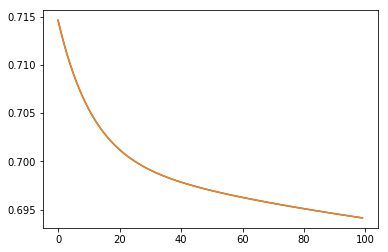

In [14]:
X_train = np.array([[-1,-1],
                    [-1,1],
                    [1,1],
                    [1,-1]])
X_train = X_train.T
Y_train = np.array([0, 1, 0, 1])
[m,n] = np.shape(X_train)
params = initialise_param(m, n, n1 = 2, n2 = 1)
neural_net1 = train_net_logistic_stochastic(X_train, Y_train, params, max_iter = 100, alpha = 0.1, verbose = False)
neural_net2 = train_net_logistic_vec(X_train, Y_train, params, max_iter = 100, alpha = 0.1, verbose = False)
# The two methods should be identical
plt.plot(neural_net1['cost_hist'])
plt.plot(neural_net2['cost_hist'])

## Logistic regression on MNIST

Let us first use a logistic regression to descriminate between 0 and 1

In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data.astype(float)
y = mnist.target.astype(float) 

m = X.shape[1]

In [16]:
# filter out only 0 and 1 and split data
ind = np.logical_or(y == 1, y == 0)
X = X[ind, :]
y = y[ind]

num_train = int(len(y) * 0.8)
X_train = X[0:num_train, :].T
X_test = X[num_train:-1,:].T
y_train = y[0:num_train].T
y_test = y[num_train:-1].T

X_train = X_train/256
X_test = X_test/256
n = X_train.shape[1]

In [19]:
params = initialise_param(m, n, n1 = 3, n2 = 1)
neural_net = train_net_logistic_vec(X_train, y_train, params, max_iter = 200, alpha = 0.2, verbose = False)

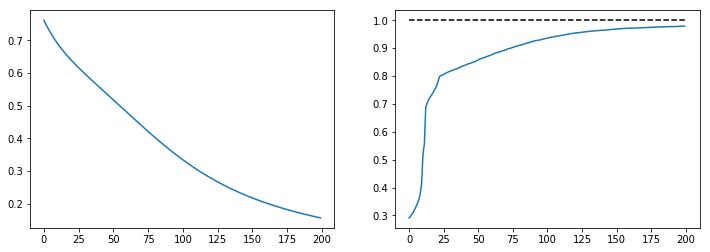

In [20]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1,2,1)
plt.plot(neural_net['cost_hist'])
plt.subplot(1,2,2)
plt.plot(neural_net['n_corr_hist']/n)
plt.plot([0,200], [1,1], 'k--')